# Proyecto 6 Analizar viajes de taxis relacionados con el clima y destino.

## Introducción
Analizaremos los conjuntos de datos `/datasets/project_sql_result_01.csv`, `/datasets/project_sql_result_04.csv` y `/datasets/project_sql_result_07.csv`  que son el resultado de nuestras consultas anteriores en sql del sitio web para poder extraer información valiosa y ayudar en la toma  de decisiones con nuestros hallazgos. Llevaremos a cabo diferentes etapas.

### Etapas
 1. Importaremos las bibliotecas que necesitemos y los conjuntos de datos.
 1. Abriremos los conjuntos de datos y estudiaremos la información en general.
 2. Prepararemos los datos al verificar que contienen los tipos de datos correctos.
 3. Crearemos graficos.
   * 4.1 Grafico empresas de taxis y número de viajes.
   * 4.2 Grafico de los 10 barrios principales por número de finalizaciones.    
 4. Probaremos Hipotesis.
 5. Escribiremos una conlusión General.

# Etapa 1 Importar las bibliotecas y los conjuntos de datos

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

# Etapa 2 y 3 abriremos los conjuntos y los alistaremos para el analisis

In [2]:
# leer los conjuntos y almacenarlos
company = pd.read_csv('/datasets/project_sql_result_01.csv')
drop_off = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
#Analizar el conjunto de datos company
company.info()
display(company.head(5))
print('\nNumero de valores duplicados:',company.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



Numero de valores duplicados: 0


El Dataframe que creamos y llamamos `company` contiene el nombre de las empresas de taxis y la cantidad de viajes que ellos han realizado en orden descendente. En primer lugar tenemos la empresa que realizo la mayor cantidad de viajes los dias 15 y 16 de Noviembre del año 2017. Por lo que la cantidad de viajes representan la suma de viajes de los dias 15 y 16 de Noviembre del año 2017.

In [4]:
#Analizar el conjunto de datos drop_off
drop_off.info()
display(drop_off.head(10))
print('\nNumero de valores duplicados:',drop_off.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667



Numero de valores duplicados: 0


El Dataframe que creamos y llamamos `drop_off` contiene en la columna `dropoff_location_name` el nombre de los barrios como lugar de Destino de los taxis en el Estado de Chicago y en la columna llamada `average_trips` contiene el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

# Observaciones de los conjuntos de datos para las graficas
Los conjuntos de datos que obtuvimos a traves de sql para poder crear nuestras graficas del sitio web estan en muy buenas condiciones para poder proseguir a analizarlos y crear las graficas. podemos ver que ninguno de los conjuntos de datos tiene valores nulos ni valores duplicados.

## Ahora analizaremos el conjunto de datos para nuestras hipotesis

In [5]:
#Analizar el conjunto de datos loop_airport 
loop_airport.info()
display(loop_airport.head(5))
print('\nNumero de valores duplicados:',loop_airport.duplicated().sum())
filas_duplicadas = loop_airport[loop_airport.duplicated()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0



Numero de valores duplicados: 197


# Observaciones del conjunto de datos para nuestras hipotesis

El Dataframe que creamos y llamamos `loop_airport` contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. la columna `start_ts` contiene la fecha y hora de la recogida, la columna `weather_conditions` contiene las condiciones climáticas en el momento en el que comenzó el viaje y la columna `duration_seconds` contiene la duración del viaje en segundos.
Nuestro conjunto de datos no tiene valores nulos, tiene valores duplicados pero no hay ningun problema y podemos dejarlos en el conjunto de datos ya que es posible que existan viajes que inicien a la misma hora y que duren el mismo tiempo en segundos, puede ser que sea comun que a esas horas las personas suelan tomar el taxi para el aeropuerto por que los vuelos estan establecidos a la misma hora y el recorrido es el mismo asi que no hay problema con dejar esos valores duplicados ya que no son malos y si los quitaramos estariamos quitando informacion valiosa de nuestro conjunto de datos. si hubieramos tenido alguna columna como `trip_id` que identificara de manera unica a cada viaje y si estuvieran duplicadas las filas si existiria un problema pero como en este caso no tenemos una columna que identifique de manera unica cada viaje y como existe la posibilidad de que los viajes inicien a la misma hora y duren el mismo tiempo dejaremos estos datos que estan duplicados que como tal no son duplicados por que representan diferentes viajes que duraron lo mismo.

# Etapa 4 Creación de Graficos 

## 4.1 Grafico de las top 5 empresas de taxis con mayor cantidad de viajes

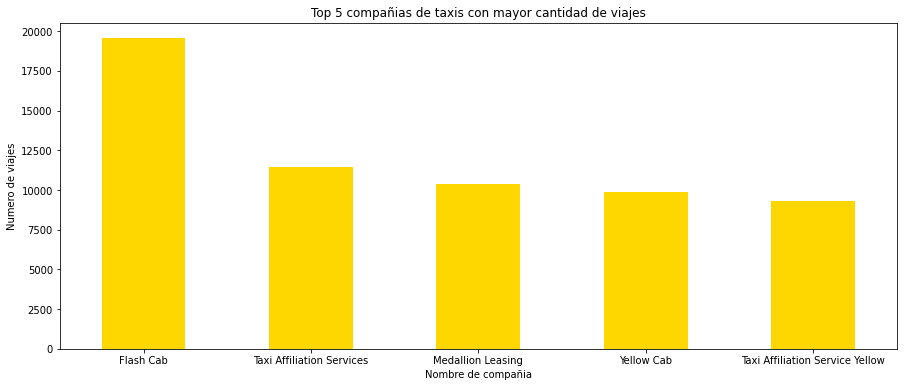

In [6]:
top5_compañias = company.groupby('company_name')['trips_amount'].sum().nlargest(5)

# Crearemos un grafico de barras
fig, ax = plt.subplots(figsize = (15,6))
top5_compañias.plot(kind='bar', color='gold')
ax.set_ylabel('Numero de viajes')
ax.set_xlabel('Nombre de compañia')
ax.set_title('Top 5 compañias de taxis con mayor cantidad de viajes')
plt.xticks(rotation= 0)
plt.show()



# Conclusion de la Grafica que representa las 5 compañias con mayor cantidad de viajes.

`Flash Cab` es la empresa de taxis con mayor cantidad de viajes y supera a sus empresas oponentes por una cantidad considerable. La empresa `Flash Cab` tiene un total de `19,558` viajes que son la suma de los viajes en el dia 15 y 16 de Noviembre del año 2017. Tomando el mismo intervalo de tiempo la siguiente empresa que le sigue con mayor cantidad de viajes es `Taxi Affiliation Services` con un total de `11,422` viajes y la siguiente empresa `Medallion Leasing` le sigue con un total de `10,367` viajes. Existe una mayor diferencia de cantidad de viajes entre la primer empresa y la segunda empresa, que la diferencia que existe entre la 2 y 3 empresa y las demas asi sucesivamente. En la grafica se nota facilmente como la primer barra tiene una altura sobresaliente en comparacion de todas las demas que a pesar que tengan diferencias, no son tan destacables como la primera barra que representa la empresa `Flash Cab`.

## 4.2 Grafico de los 10 barrios principales como destino en Chicago.

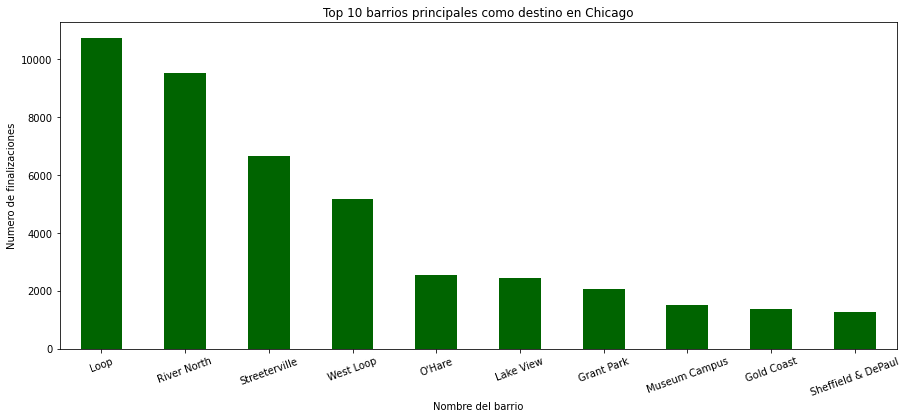

In [7]:
top10_finalizaciones = drop_off.groupby('dropoff_location_name')['average_trips'].sum().nlargest(10)

# Crearemos un grafico de barras
fig, ax = plt.subplots(figsize = (15,6))
top10_finalizaciones.plot(kind='bar', color='darkgreen')
ax.set_ylabel('Numero de finalizaciones')
ax.set_xlabel('Nombre del barrio')
ax.set_title('Top 10 barrios principales como destino en Chicago')
plt.xticks(rotation= 20)
plt.show()

# Conclusion de la grafica que los 10 barrios principales como destino en Chicago.

Esta grafica nos muestra claramente como hay barrios que son mas comunes como lugar de destino en comparacion de otros. En la grafica podemos ver que hay 4 barras que resaltan mas que las otras por que son mas comunes como lugar de destino. Los nombreremos empezando por el barrio con mayor numero de finalizaciones o como lugar de destino `Loop` con un promedio de `10727.5` viajes como lugar de destino en el mes de noviembre despues `River North` con un promedio de `9523.7`, despues `Streeterville` con un promedio de `6664.7` y la ultima barra que tambien resalta es la del barrio `West Loop` con un promedio de `5163.7`. A medida que bajamos de barrio que tienen menor cantidad de viajes podemos ver que la diferencia se vuelve mayor pero a partir del barrio `West Loop` los demas barrios no tienen una gran diferencia como el de los demas barrios y si compararamos el primer barrio `Loop` con el barrio que tiene menos `Sheffield & DePaul` veriamos que hay una diferencia significativa de promedio de `9,467` viajes como lugar de destino.

# Etapa 5 Probaremos la Hipotesis

### Ahora probaremos la hipotesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos
1. Nuestra Hipotesis Nula sera que la duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
2. Nuestra Hipotesis Alternativa sera que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
3. Para lograr esto llevaremos acabo un ttest con nuestro valor Alfa en 0.05 osea en un 5 porciento.

In [8]:
lluvioso = loop_airport[loop_airport['weather_conditions'] == 'Bad']['duration_seconds']
no_lluvioso = loop_airport[loop_airport['weather_conditions'] == 'Good']['duration_seconds']

#Verificar que las varianzas sean las mismas o diferentes
varianza_lluvioso = lluvioso.var() #Varianza de dias lluviosos
print(f'Varianza de los sabados lluviosos:{varianza_lluvioso}')
varianza_no_lluvioso = no_lluvioso.var() #Varianza de dias no lluviosos
print(f'Varianza de los sabados no lluviosos:{varianza_no_lluvioso}')
print('Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest\n')

# Realizaremos el ttest
alpha = 0.05
results , pvalue = ttest_ind(lluvioso, no_lluvioso, equal_var = False)
display('p_value:', pvalue)

if pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No se puede rechazar la hipotesis nula")
    
print('duracion promedio en segundos de un viaje un sabado lluvioso:', lluvioso.mean())
print('duracion promedio en segundos de un viaje un sabado  no lluvioso:', no_lluvioso.mean())

Varianza de los sabados lluviosos:520294.086002483
Varianza de los sabados no lluviosos:576382.009689509
Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest



'p_value:'

6.738994326108734e-12

Rechazamos la hipótesis nula.
duracion promedio en segundos de un viaje un sabado lluvioso: 2427.2055555555557
duracion promedio en segundos de un viaje un sabado  no lluvioso: 1999.6756756756756


Rechazamos la hipótesis nula por que con la informacion que tenemos nuestro test estadistico nos dice que hay una diferencia significativa entre la duracion de los viajes los sabados que son lluviosos en comparación de los sabados que no llueve. Sabemos que existe una diferencia en la duración de los viajes y por lo tanto para poder darnos una mejor idea de que sabado lluvioso o no lluvioso duran mas los viajes, sacamos un promedio de la duracion de los viajes y podemos ver que los sabados lluviosos duran mucho mas los viajes y por lo tanto podemos ver que el clima lluvioso si genera un cambio en la duracion de los viajes.

# Conclusion del proyecto

Recuperar los datos del sitio web y crear slices de datos de una manera correcta desde el principio nos ahorrara demasiado tiempo. Al extraer y preparar bien los datos con anticipacion a traves de sql nos ahorro demasiado tiempo en este proyecto ya que no tuvimos que usar mucho tiempo para investigar por que habian datos duplicados o valores nulos y fue mas rapido y eficiente para nosotros la creacion de graficas y la prueba de hipotesis. De este analisis me gustaria destacar 3 puntos principales.

1. `Flash Cab` es la empresa de taxis con mayor cantidad de viajes y supera a sus empresas oponentes por una cantidad considerable. 

2. `Loop` es el barrio mas comun como destino en Chicago con un promedio de `10,727.5` viajes como lugar de destino durante el mes de Noviembre.

3. La duración de los viajes los sabados lluviosos duran mucho mas que los viajes de los sabados no lluvisos por lo que concluimos el clima lluvioso si genera un cambio en la duracion de los viajes.